<a href="https://colab.research.google.com/github/FunmiSomoye/School-Projects/blob/master/Agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assessment

### Funmi Somoye

k-Means puts data points in predetermined clusters. There is another algorithm allows the learning algorithm to determine the number of clusters. This is a hierarchical clustering algorithm. An agglomerative clustering algorithm builds clusters using a bottom up approach. Each data point starts off in its own cluster. The algorithm then iteratively combines clusters until it forms one cluster. 

The results of the algorithm are shown using a dendogram. A dendogram is an upside down tree. At the bottom are the singleton clusters or clusters with single data points. At the top of the tree is a root, or the single cluster. 

### The data

The dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+quality) and "contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005, for one year. Hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value."

The following are the descriptions of the columns we will be working with:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in °C
    13 Relative Humidity (%)
    14 AH Absolute Humidity 
    

### The goal
The goal of the assessment is to determine the optimal number of clusters for the learning algorithm. Use the agglomerative clustering technique in the `scipy` package to do this. Use the dataset `AirQualityUCI.csv`. More specifically, determine if there is a relationship between the predictor features `PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)` and `True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)`

### Import the libraries

Import the necessary libraries for file manipulation and learning algorithms. Do not forget to upload the visualizations packages as well.

In [ ]:
from sklearn import preprocessing # for preprocessing like imputting missing values and standardisation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
%matplotlib inline 

### Preprocess the data

Observe that there a missing values in the dataset. Imput missing values with the mean or median. Can you make any suggestions for standardizing or normalising the data points?

In [ ]:
df = pd.read_csv('AirQualityUCI.csv') #load data

##### Explore Data

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888


In [ ]:
df.shape

(9357, 14)

##### Assess missing values

In [ ]:
(df.iloc[:, 2:] == -200.0).sum() #assess missing values in all columns excluding date and time columns

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
AH                366
dtype: int64

There are so many missing values. Replace them with Median

In [ ]:
df.replace(-200.0, df.median(), inplace=True)

##### Feature Selection

From the 'Goal', concerned features are `PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)` and `True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) - NMHC(GT)`

Perform descriptive statistics

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.035343,1098.001282,-159.090093,9.997713,937.426312,228.347547,833.870578,110.092017,1455.863097,1019.741477,18.274105,1.023624
std,1.339737,212.985308,139.789093,7.314906,261.700283,197.570902,251.872460,44.399549,339.373394,390.927152,8.660352,0.395948
min,0.100000,647.000000,-200.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,0.184700
25%,1.200000,941.000000,-200.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,0.746100
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,2.231000


In [ ]:
#

##### visualise the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004599CDD1D0>,
      dtype=object)

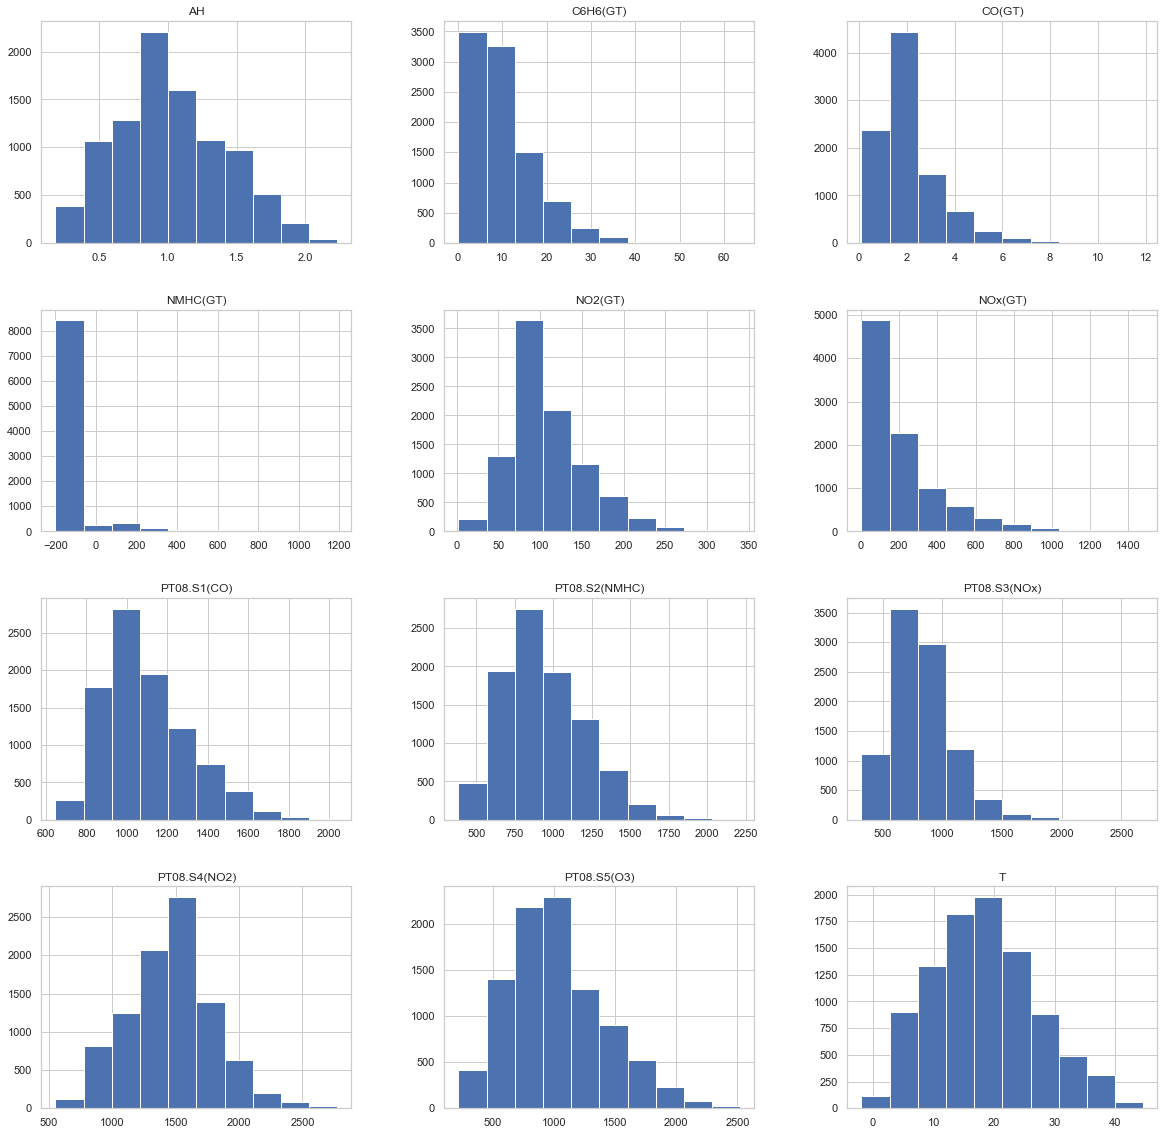

In [ ]:
pd.DataFrame.hist(df, figsize=(20,20))

From the above, the scales for the selected features 'PT08.S1(CO)' and 'NMHC(GT)' are very different. Thus, standardisation is needed.

In [ ]:
#visualise relationship between features

Text(0.5, 1.0, 'Relationship between features')

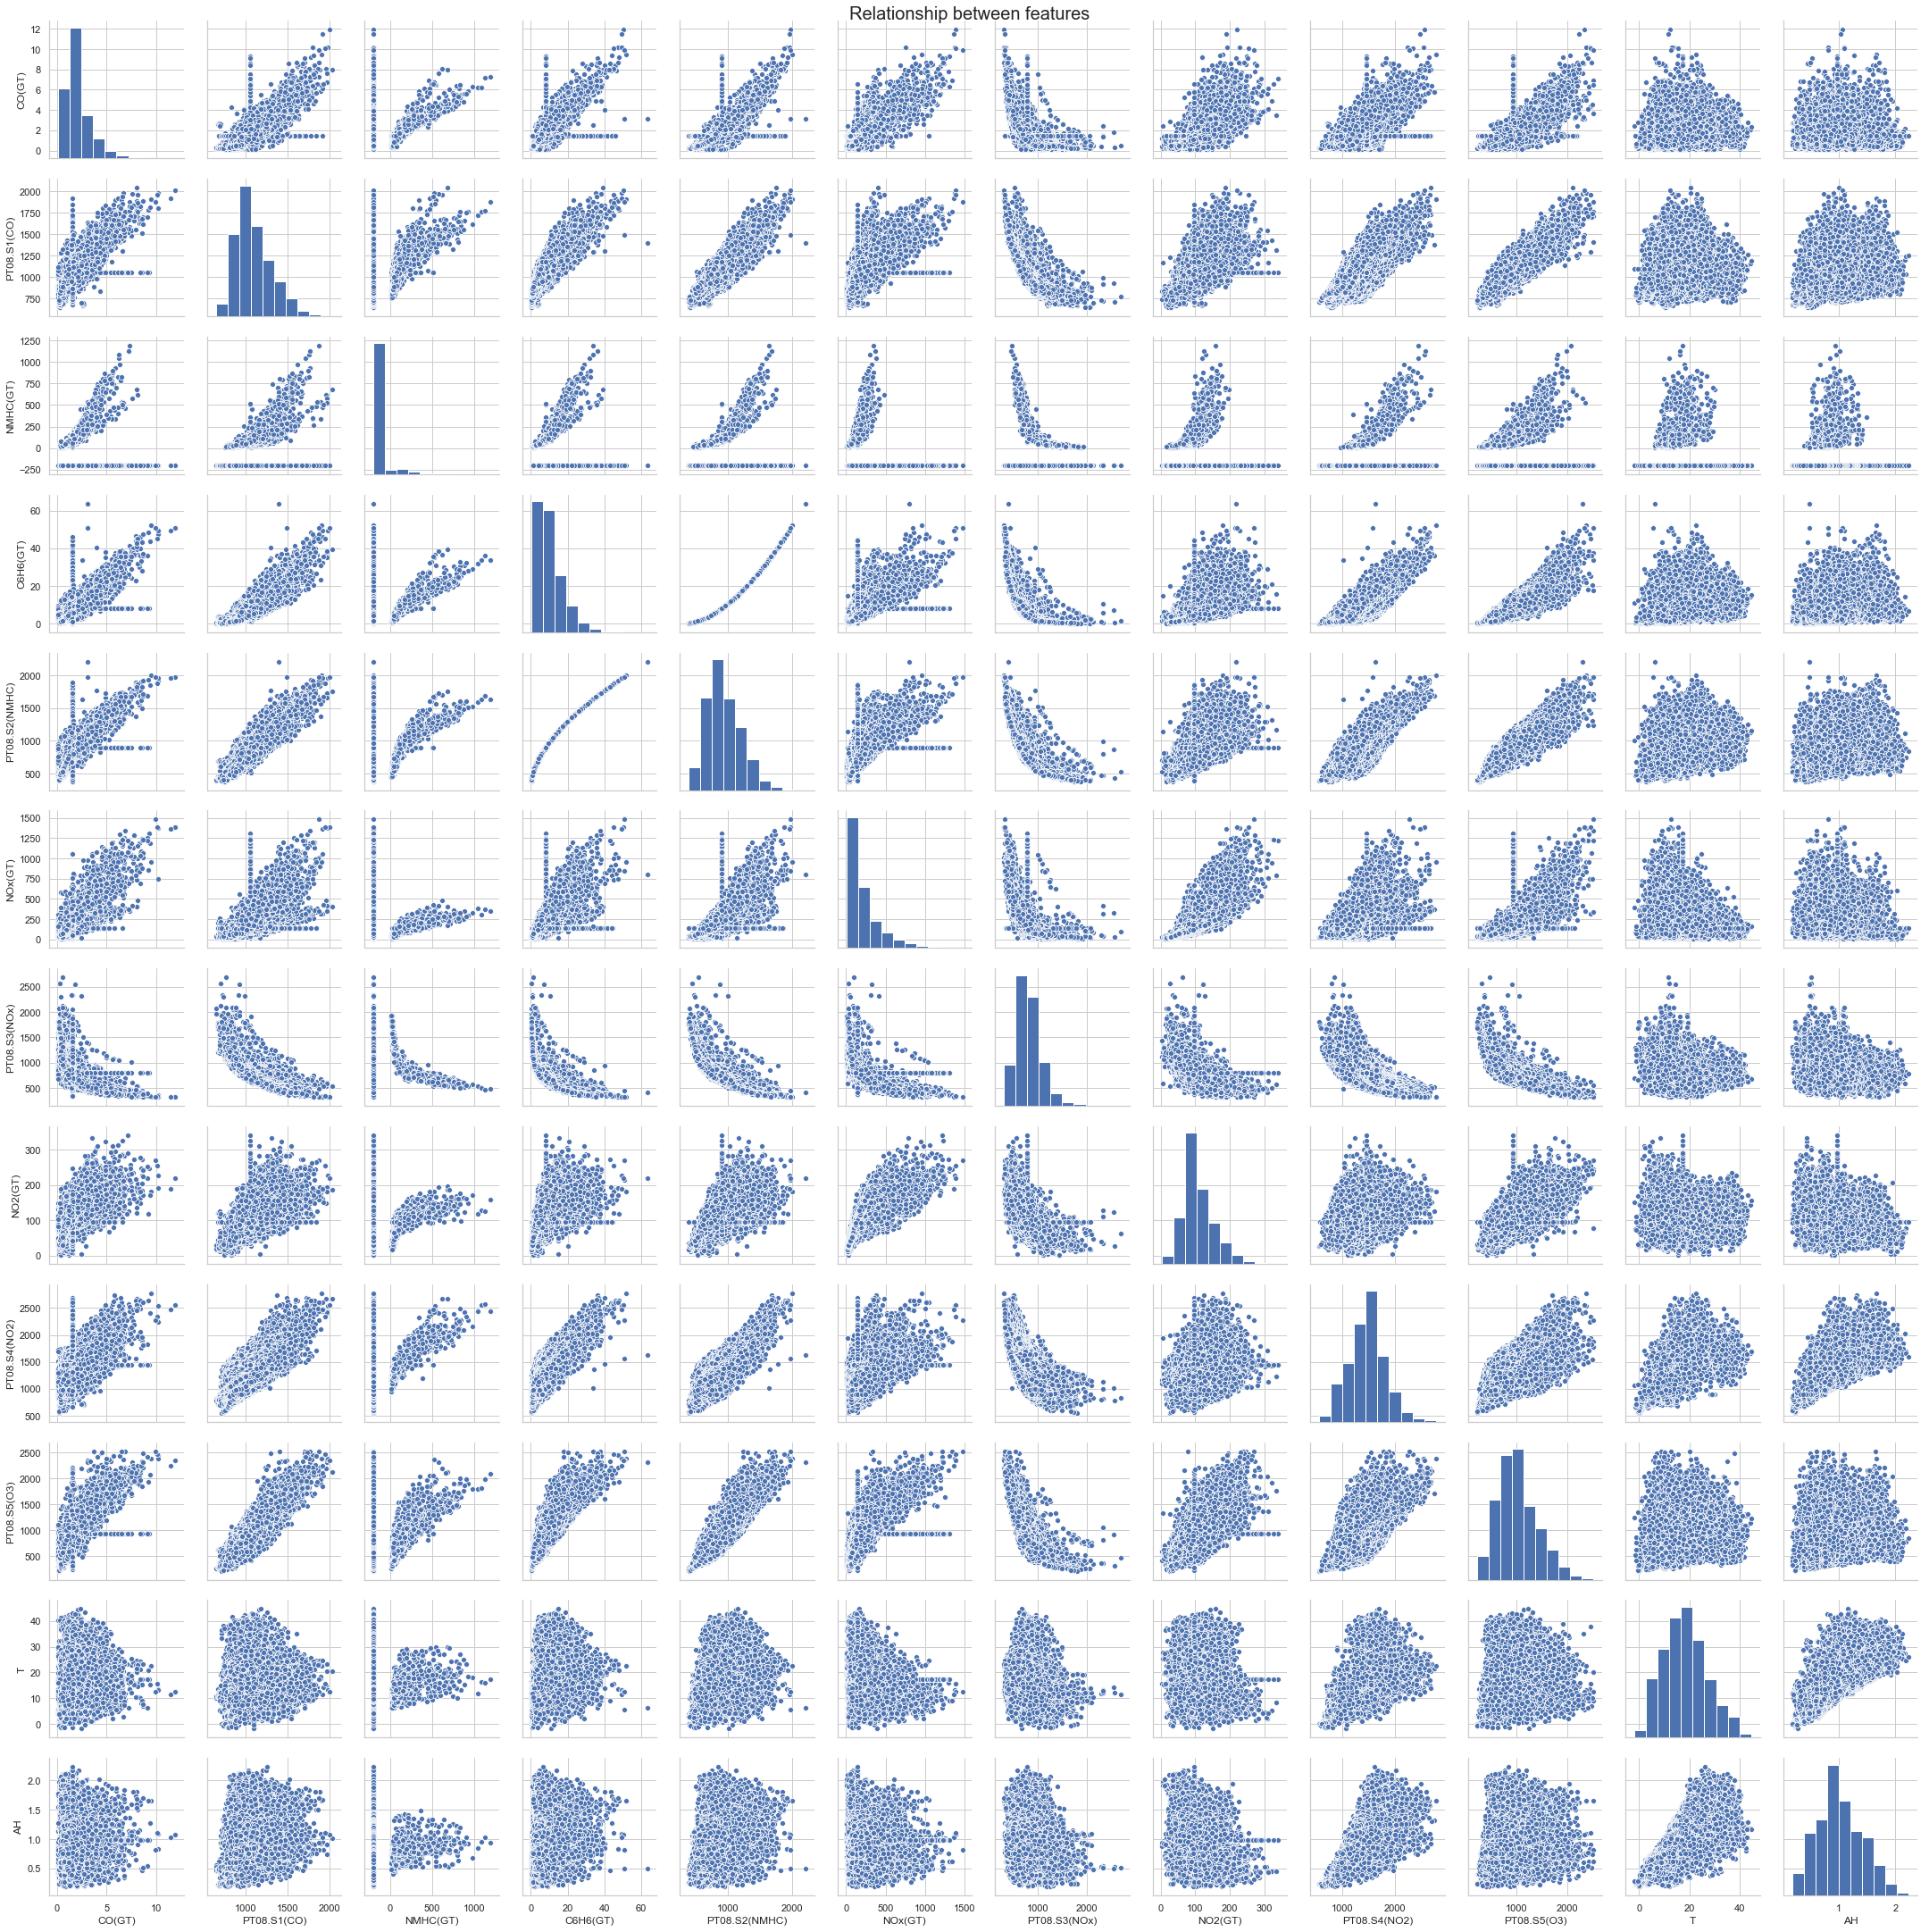

In [ ]:
sns.pairplot(df)
#plt.title('Relationship between features', size = 20, y=2.30, x=0.005)
# Title 
plt.suptitle('Relationship between features', 
             size = 20, y=1.0)

Text(0.5, 1.0, 'Correlation (Pearson) heatmap between features')

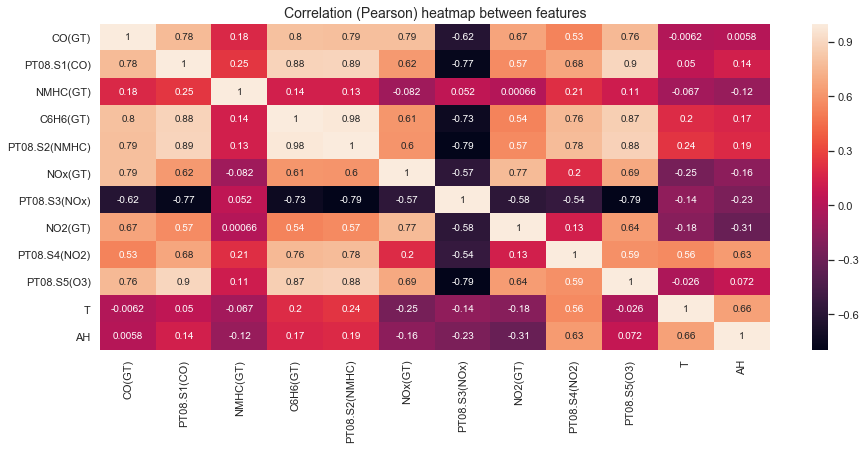

In [ ]:
#calculate and plot correlation of variables across entire dataframe
fig = plt.figure(figsize=(15, 6))
corr = df.corr(method ='pearson') #compute pearson's correlation coefficient
sns.heatmap(corr, annot=True) #set annot to True to show r score across map
plt.title('Correlation (Pearson) heatmap between features', size = 14)

The heatmap above shows that there is a positive relationship with pearson coefficient of 0.25 between PT08.S1(CO) and NMHC(GT)


In [ ]:
import scipy.stats as scs

(0.24760439960905595, 9.975875460789087e-131)


<Figure size 720x432 with 0 Axes>

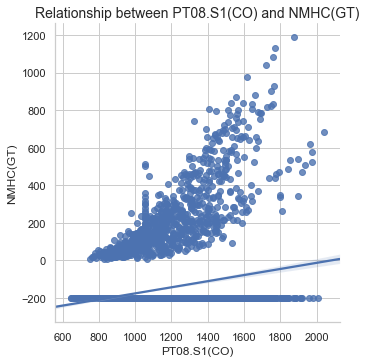

In [ ]:
#visualise relationship between PT08.S1(CO) and NMHC(GT)

fig = plt.figure(figsize=(10, 6)) # figure for subplots

sns.lmplot(x='PT08.S1(CO)',y='NMHC(GT)', data=df)

#Set title for plot
plt.title('Relationship between PT08.S1(CO) and NMHC(GT)', size = 14)

#compute and print pearson's corr.
print(scs.pearsonr(df['PT08.S1(CO)'], df['NMHC(GT)']))

Indeed, there is a relationship between PTO8.S1(CO) and NMHC(GT); a small positive linear relationship.

##### Transform data

In [ ]:
#view needed features
df1 = df.iloc[:, 3:5]
df1.head()

,PT08.S1(CO),NMHC(GT)
0,1360.0,150.0
1,1292.0,112.0
2,1402.0,88.0
3,1376.0,80.0
4,1272.0,51.0


In [ ]:
#Extract needed features 
X = df[['PT08.S1(CO)', 'NMHC(GT)']].values

In [ ]:
X

array([[1360.,  150.],
       [1292.,  112.],
       [1402.,   88.],
       ...,
       [1142., -200.],
       [1003., -200.],
       [1071., -200.]])

Use the safest MinMaxScaler to standardize

In [ ]:
#Normalise features 
scaler = preprocessing.MinMaxScaler() #create scaler
Xs = scaler.fit_transform(X) #scale feature
Xs #show features

array([[0.51184494, 0.25197984],
       [0.46302943, 0.22462203],
       [0.54199569, 0.20734341],
       ...,
       [0.35534817, 0.        ],
       [0.25556353, 0.        ],
       [0.30437904, 0.        ]])

In [ ]:
#put into a pandas dataframe
# columns
columns_new = ['PT08.S1(CO)', 'NMHC(GT)']
# pass in array and columns
fdata = pd.DataFrame(Xs, columns=columns_new)

In [ ]:
fdata.head()

,PT08.S1(CO),NMHC(GT)
0,0.511845,0.251980
1,0.463029,0.224622
2,0.541996,0.207343
3,0.523331,0.201584
4,0.448672,0.180706


### Choose the optimal number of clusters using a dendogram

Before attempting to solve the problem, separate the predictor features in the dataset from the target feature. That is, create a matrix, usually named X, to store the predictor values.

The code to determine the optimal number of clusters is illustrated. Given the predictor matrix, X, use the following code to determine the number of clusters.

    import scipy.cluster.hierarchy as sch
    Z = sch.linkage(X, 'ward')
    plt.figure(figsize=(12,7))
    dendogram = sch.dendrogram(Z)
    
Use the `scipy.cluster.hierarchy` package to design a dendogram. 

The option 'ward' is a distance measure that minimizes the variance between clusters.

In [ ]:
import scipy.cluster.hierarchy as sch #for heirachical clustering

In [ ]:
#creating the linkage matrix
A_cluster = sch.linkage(fdata, 'ward')

Text(0, 0.5, 'distance')

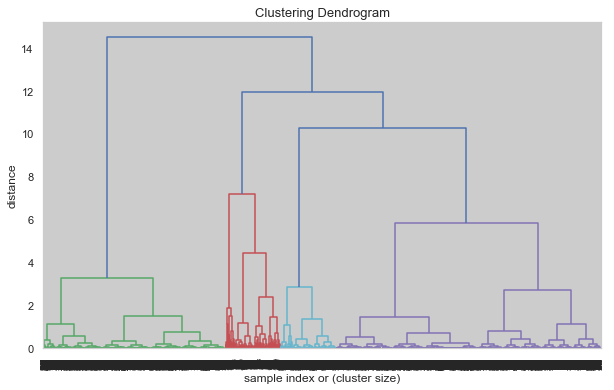

In [ ]:
#plot full figure
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(A_cluster)

plt.title('Clustering Dendrogram', size=13)
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

Text(0, 0.5, 'distance')

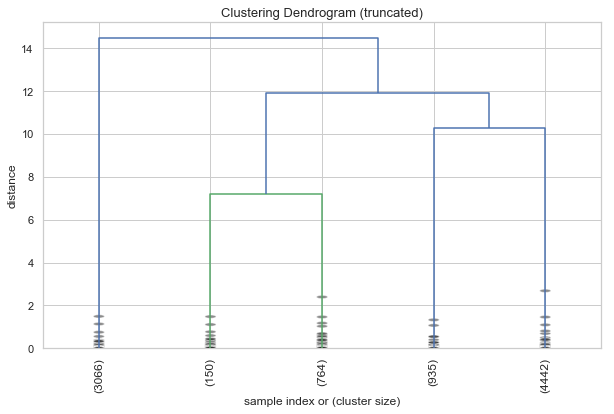

In [ ]:
#Truncated plotting
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(A_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90., #rotates the x-axis labels
    leaf_font_size=12., #set size for the x-axis labels
    show_contracted=True,  # to get a distribution impression in truncated branches
 )
plt.title('Clustering Dendrogram (truncated)', size=13)
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

#### What is the optimal number of clusters?

The resulting diagram shows the data points on the x-axis and dissimilarity scores on the y-axis. For this exercises, let's use a dissimilarity score of 10000. A horizontal line from the threshold value intersects three branches of the dendogram. Use three as the number of clusters to for the model.

### Fit the model and do some predictions

Instead of k-Means, we'll use agglomerative clustering. Create a clustering model using the following code:

    hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
    
Then fit your model and predict using the model.

In [ ]:
#import the needed class
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Function for Agglomerative Clustering; fit and predict model
def doAgglomerative(X, nclust=2):
    hc = AgglomerativeClustering(n_clusters=nclust, linkage = 'ward')
    y = hc.fit_predict(X)
    return (y)


In [ ]:
#fit the model and do prediction using the Agglomerative function
y1 = doAgglomerative(fdata, 3)

##### Determine the labels of the clustering model.

In [ ]:
fdata['Clusters_3'] = y1 #create new column on dataframe
c1 = fdata['Clusters_3'].unique().tolist() #store distinct values into c1
print ('The Labels of the Cluster are', c1)

The Labels of the Cluster are [2, 0, 1]


### Visualize the clusters

Visualize the clusters with a scatter plot. Colour-code the different clusters. 

Text(0.5, 1.0, 'Airquality Data - Agglomerrative Clustering (3); PT08.S1(CO) \tNMHC(GT)')

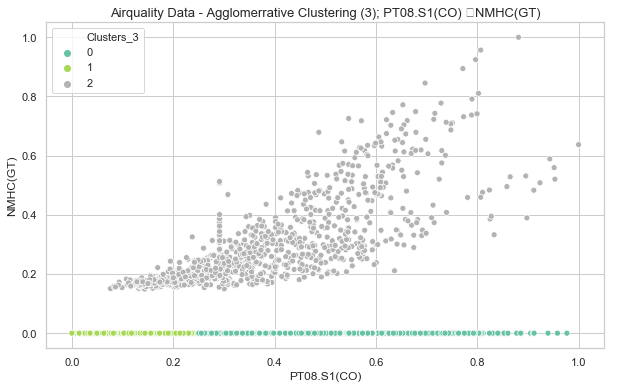

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PT08.S1(CO)', y='NMHC(GT)', data=fdata, palette='Set2', hue='Clusters_3')

plt.title('Airquality Data - Agglomerrative Clustering (3); PT08.S1(CO) 	NMHC(GT)', size=13)

### Performance

In [ ]:
from sklearn import metrics

In [ ]:
s1 = metrics.silhouette_score(fdata, y1)
print('The Silhouette coefficient value is', s1)

The Silhouette coefficient value is 0.8852940686190625


### Interpretation

The above silhouette score of approximately 0.885, indicates that the model has a strong structure

### More clusters

Do more clusters mean anything?

##### Begin with 5 clusters.

In [ ]:
#5 Clusters
#fit the model and do prediction using the Agglomerative function
y2 = doAgglomerative(fdata, 5)

In [ ]:
#get cluster labels
fdata['Clusters_5'] = y2 #create new column on dataframe
c2 = fdata['Clusters_5'].unique().tolist() #store distinct values into c1
print ('The Labels of the Cluster are', c2)

The Labels of the Cluster are [1, 4, 0, 3, 2]


Text(0.5, 1.0, 'Airquality Data - Agglomerrative Clustering (5); PT08.S1(CO) \tNMHC(GT)')

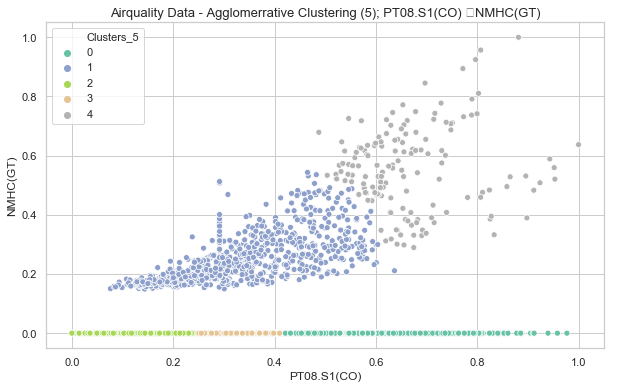

In [ ]:
plt.figure(figsize=(10, 6))
# Save a palette to a variable:
sns.scatterplot(x='PT08.S1(CO)', y='NMHC(GT)', data=fdata, palette='Set2', hue='Clusters_5', legend='full')

plt.title('Airquality Data - Agglomerrative Clustering (5); PT08.S1(CO) 	NMHC(GT)', size=13)

In [ ]:
s2 = metrics.silhouette_score(fdata, y2)
print('The Silhouette coefficient value is', s2)

The Silhouette coefficient value is 0.9524878746068604


The above model with a silhouette score of approximately 0.952 has a very very strong structure

In [ ]:
#

##### For 6 clusters.

In [ ]:
#6 Clusters
#fit the model and do prediction using the Agglomerative function
y3 = doAgglomerative(fdata, 6)

In [ ]:
#get cluster labels
fdata['Clusters_6'] = y3 #create new column on dataframe
c3 = fdata['Clusters_6'].unique().tolist() #store distinct values into c1
print ('The Labels of the Cluster are', c3)

The Labels of the Cluster are [0, 4, 5, 2, 1, 3]


Text(0.5, 1.0, 'Airquality Data - Agglomerrative Clustering (6); PT08.S1(CO) \tNMHC(GT)')

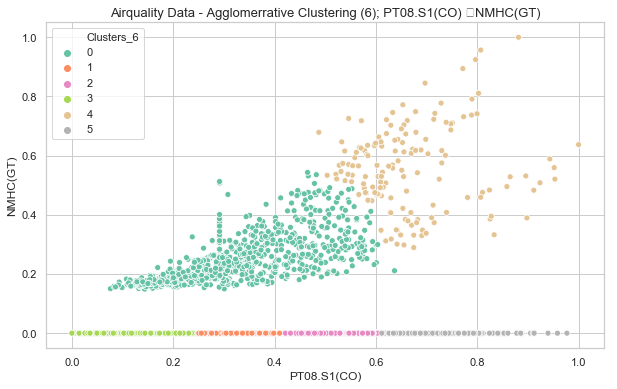

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PT08.S1(CO)', y='NMHC(GT)', data=fdata, palette='Set2', hue='Clusters_6', legend='full')

plt.title('Airquality Data - Agglomerrative Clustering (6); PT08.S1(CO) 	NMHC(GT)', size=13)

In [ ]:
s3 = metrics.silhouette_score(fdata, y3)
print('The Silhouette coefficient value is', s3)

The Silhouette coefficient value is 0.9731831438275254


The above with a silhouette score of approximately 0.973 is excellent and shows that the model has a very strong structure

##### For 10 clusters.

In [ ]:
#10 Clusters
#fit the model and do prediction using the Agglomerative function
y4 = doAgglomerative(fdata, 10)

In [ ]:
#get cluster labels
fdata['Clusters_10'] = y4 #create new column on dataframe
c4 = fdata['Clusters_10'].unique().tolist() #store distinct values into c1
print ('The Labels of the Cluster are', c4)

The Labels of the Cluster are [0, 6, 2, 1, 4, 9, 3, 7, 5, 8]


Text(0.5, 1.0, 'Airquality Data - Agglomerrative Clustering (10); PT08.S1(CO) \tNMHC(GT)')

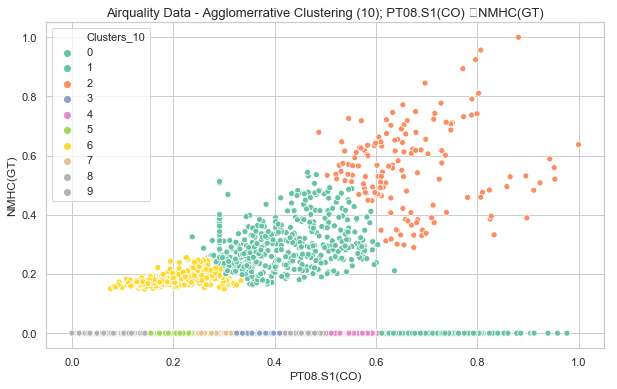

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PT08.S1(CO)', y='NMHC(GT)', data=fdata, palette="Set2", hue='Clusters_10', legend='full')

plt.title('Airquality Data - Agglomerrative Clustering (10); PT08.S1(CO) 	NMHC(GT)', size=13)

In [ ]:
s4 = metrics.silhouette_score(fdata, y4)
print('The Silhouette coefficient value is', s4)

The Silhouette coefficient value is 0.9867236462779014


The above with a silhouette score of approximately 0.987 performs way better than for other clusters. It is a very strong structure, and is the best structure so far.

In [ ]:
#

##### For 15 clusters.

In [ ]:
#15 Clusters
#fit the model and do prediction using the Agglomerative function
y5 = doAgglomerative(fdata, 15)

In [ ]:
#get cluster labels
fdata['Clusters_10'] = y5 #create new column on dataframe
c5 = fdata['Clusters_10'].unique().tolist() #store distinct values into c1
print ('The Labels of the Cluster are', c5)

The Labels of the Cluster are [0, 10, 2, 5, 8, 6, 7, 1, 3, 13, 9, 12, 4, 11, 14]


In [ ]:
s5 = metrics.silhouette_score(fdata, y5)
print('The Silhouette coefficient value is', s5)

The Silhouette coefficient value is 0.9830101249763287


Text(0.5, 1.0, 'Airquality Data - Agglomerrative Clustering (15); PT08.S1(CO) \tNMHC(GT)')

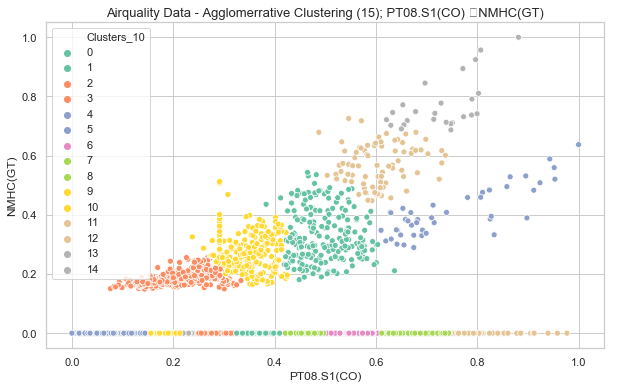

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PT08.S1(CO)', y='NMHC(GT)', data=fdata, palette="Set2", hue='Clusters_10', legend='full')

plt.title('Airquality Data - Agglomerrative Clustering (15); PT08.S1(CO) 	NMHC(GT)', size=13)

##### Prove a interpretation for the performance variation when the number of clusters are increased.

In [ ]:
print('The Silhouette coefficient value for 3 clusters is', s1)
print('The Silhouette coefficient value for 5 clusters is', s2)
print('The Silhouette coefficient value for 6 clusters is', s3)
print('The Silhouette coefficient value for 10 clusters is', s4)
print('The Silhouette coefficient value for 15 clusters is', s5)

The Silhouette coefficient value for 3 clusters is 0.8852940686190625
The Silhouette coefficient value for 5 clusters is 0.9524878746068604
The Silhouette coefficient value for 6 clusters is 0.9731831438275254
The Silhouette coefficient value for 10 clusters is 0.9867236462779014
The Silhouette coefficient value for 15 clusters is 0.9830101249763287


3 Clusters has the lowest Silhouette coefficient value. 

Although not an actual representation of the obtained silhouette values for eah samples
The scores above show that the silhouette value does not exactly have a positive linear relationship with the number of clusters as the value dips at 15 clusters. 
This shows that there is something more influencing the performance variation of the models.

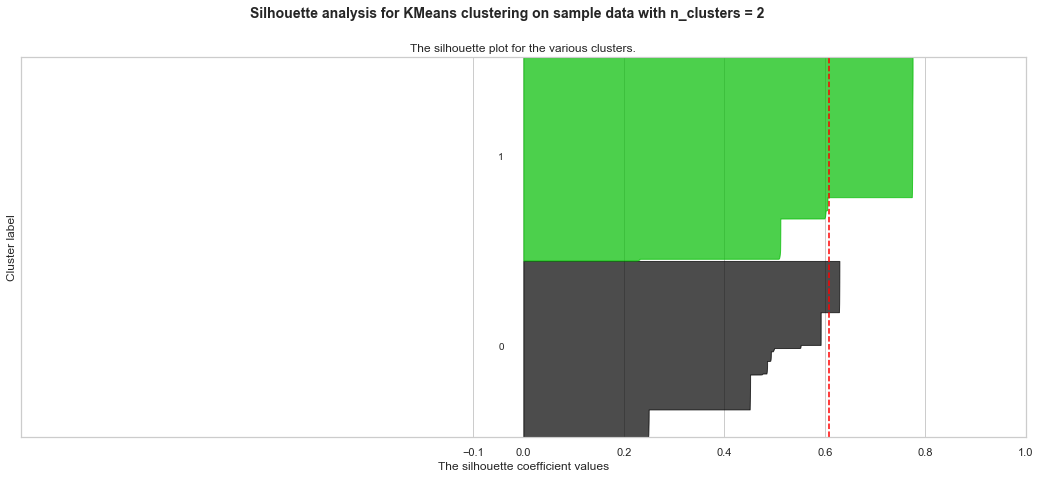

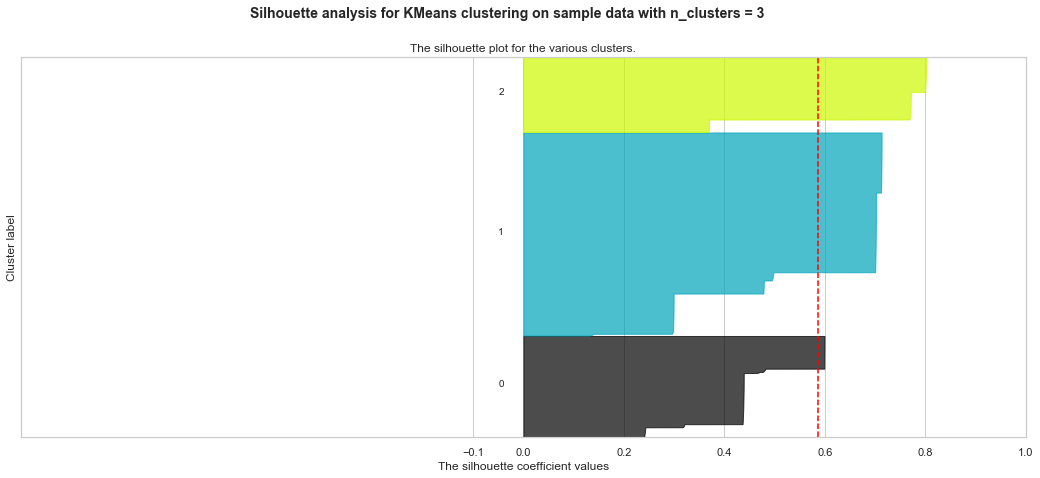

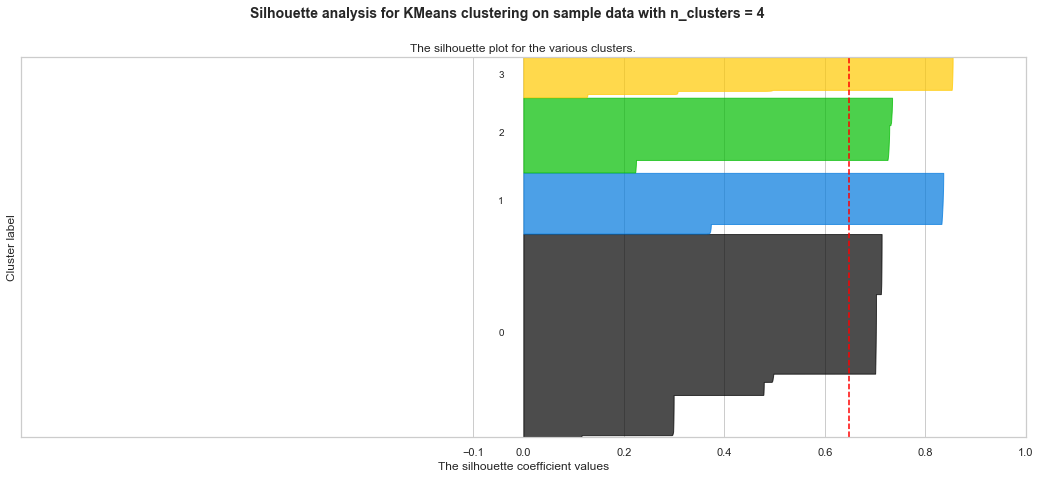

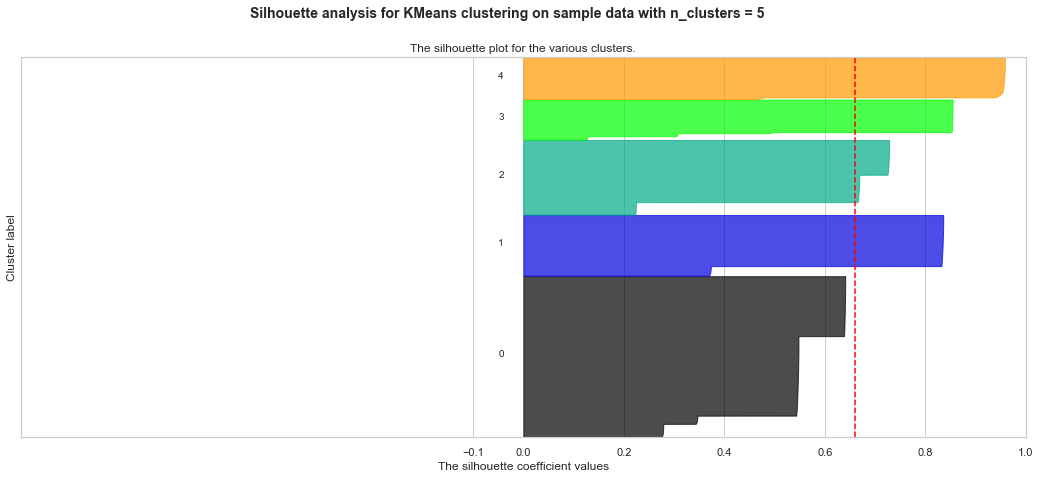

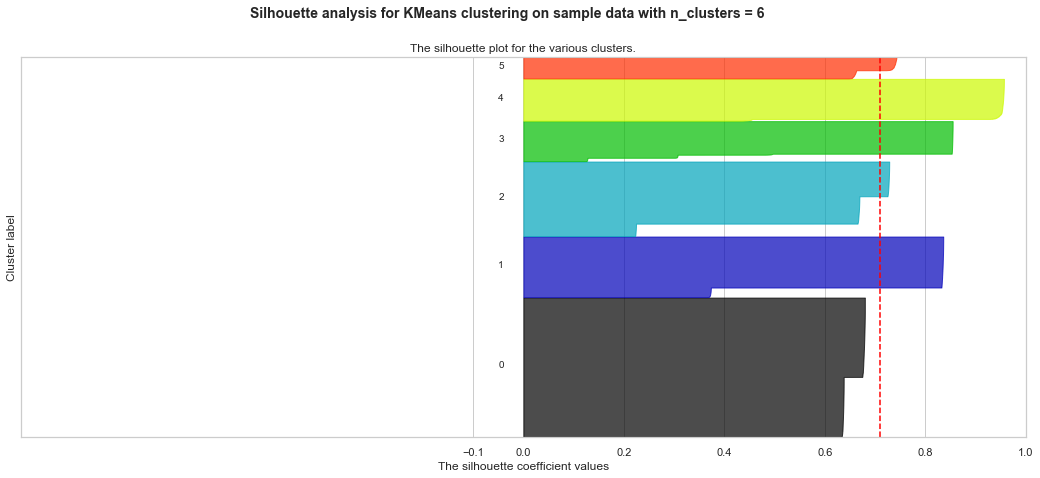

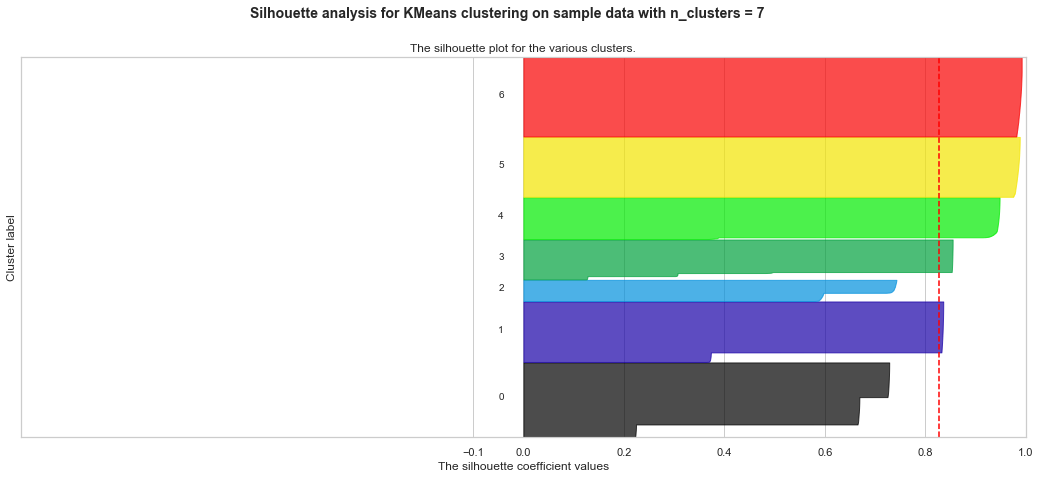

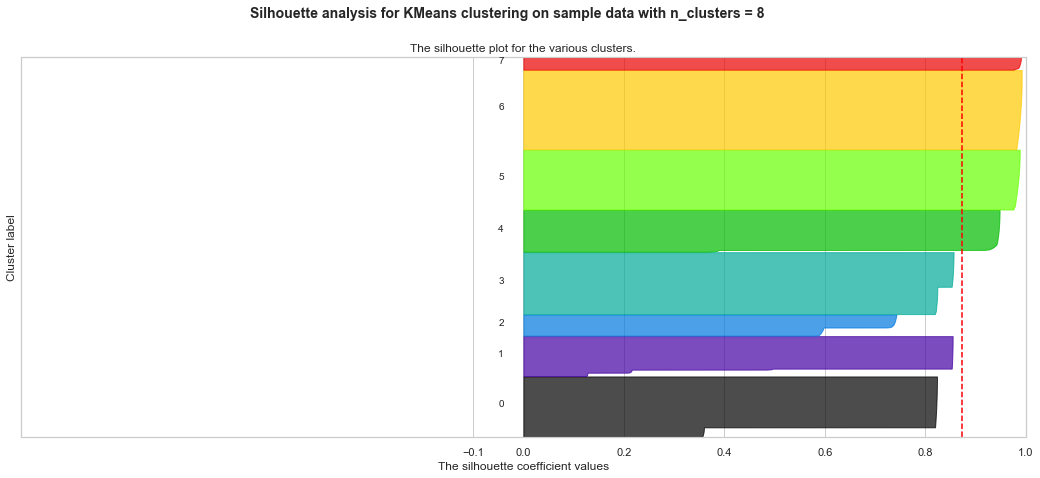

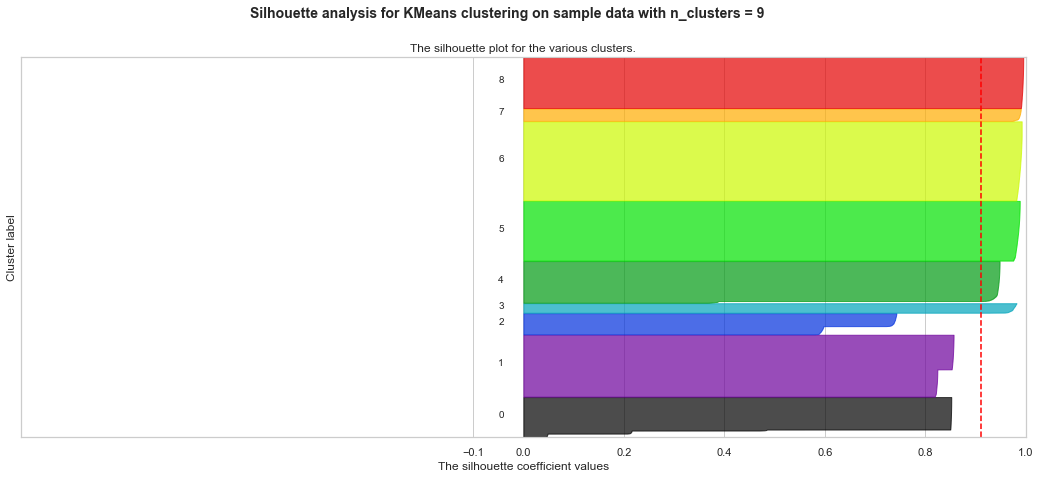

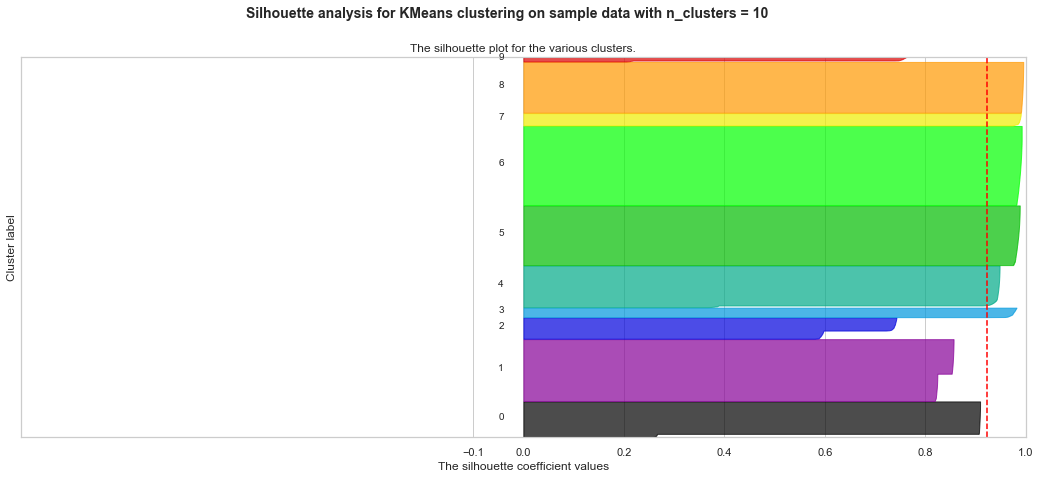

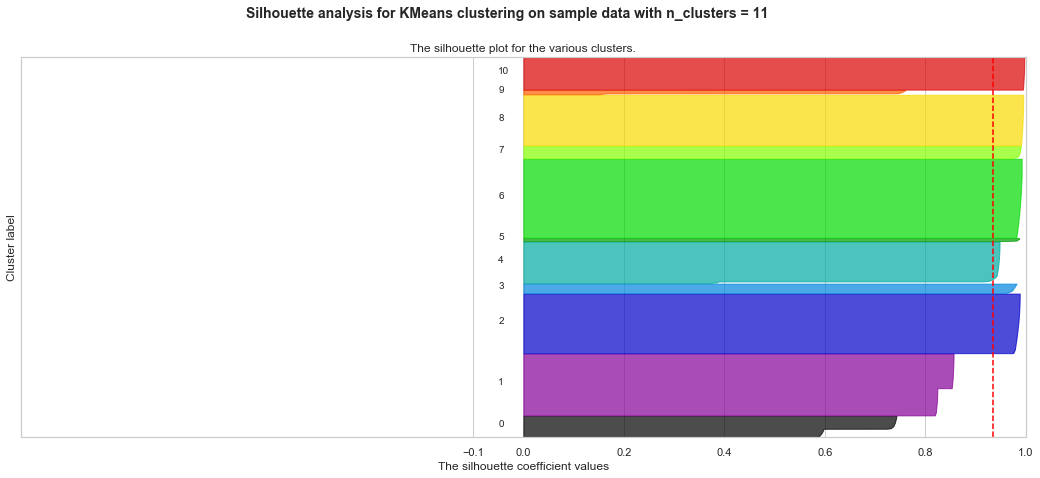

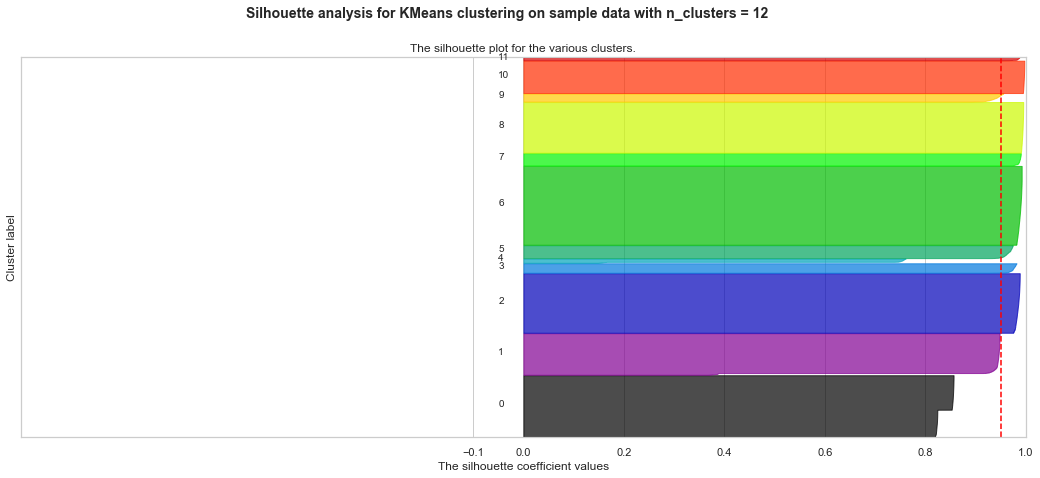

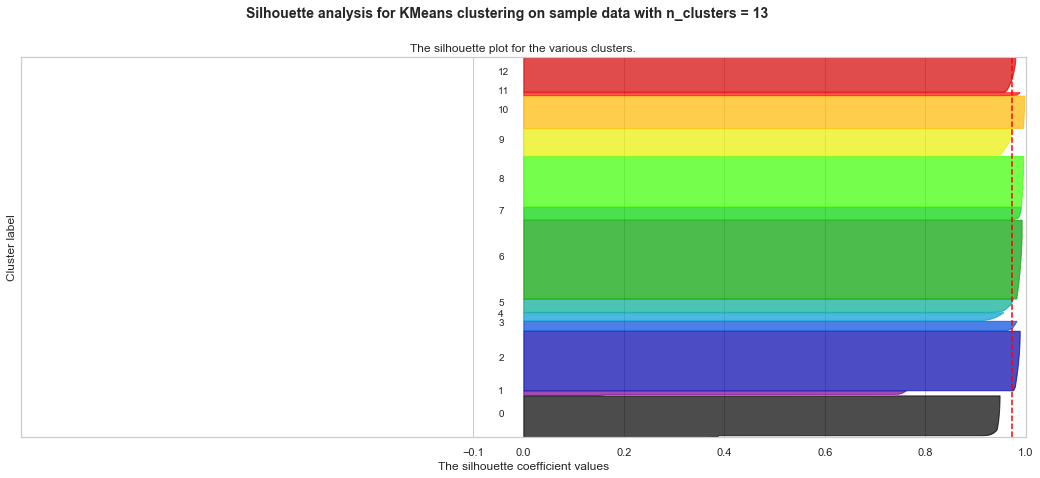

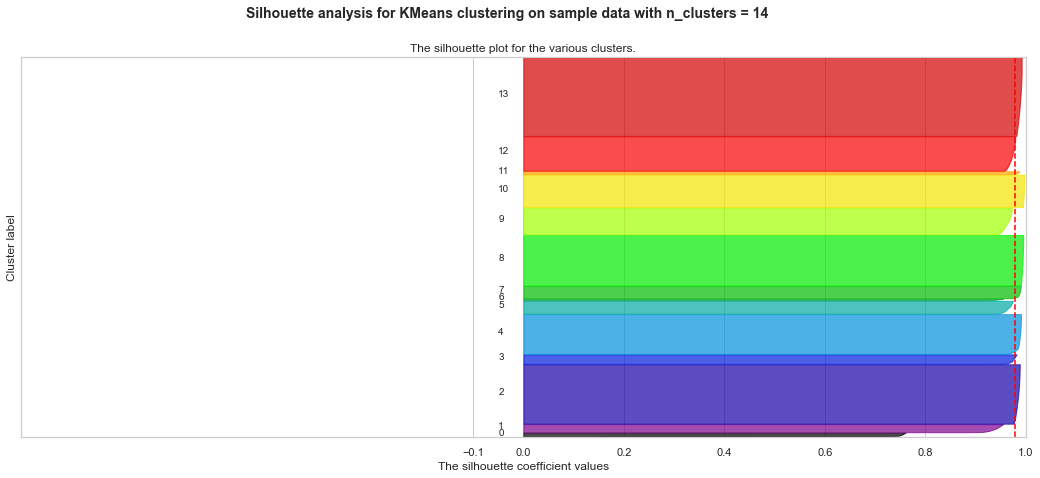

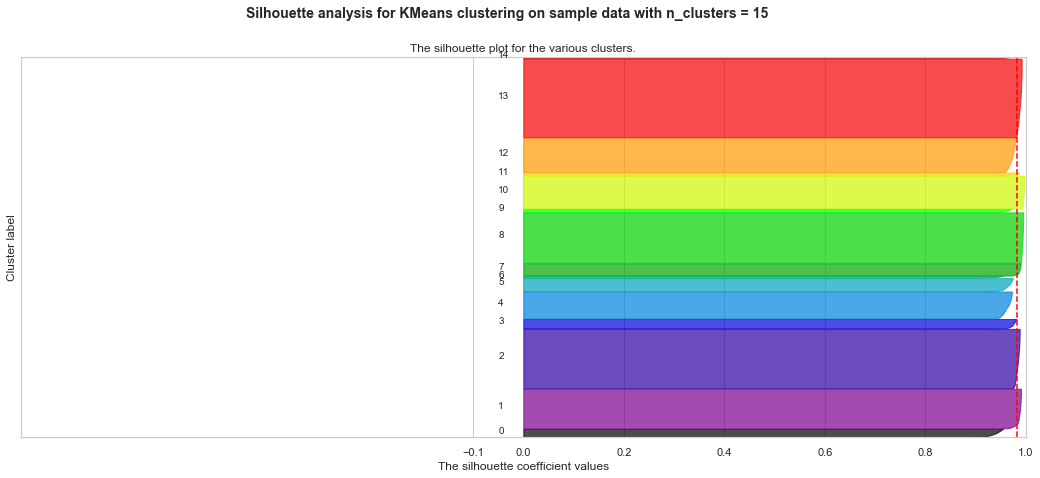

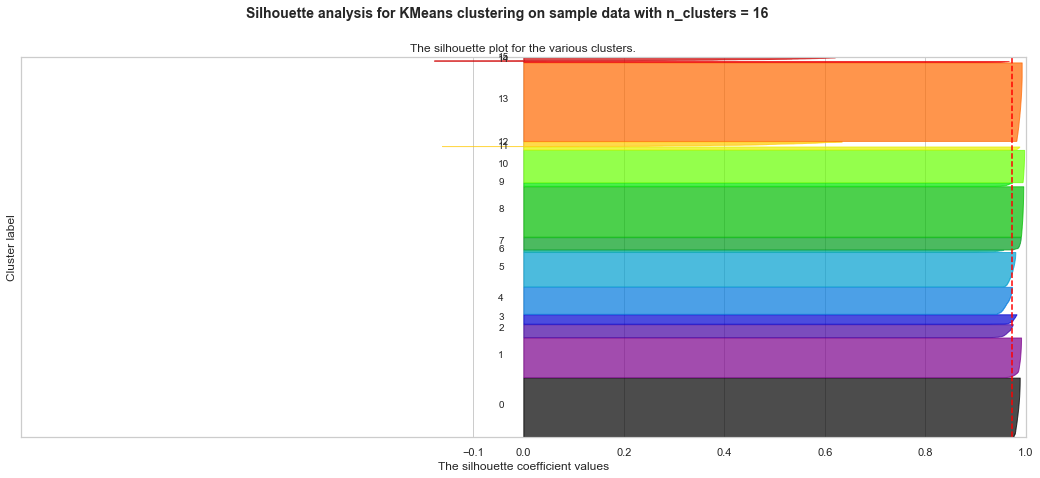

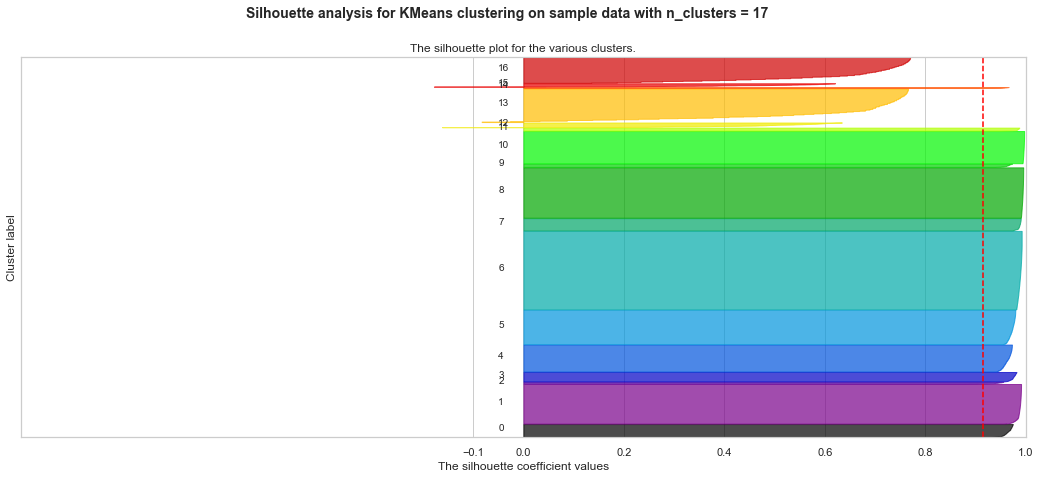

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-1, 1]
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(Xs) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'ward')
    cluster_labels = clusterer.fit_predict(fdata)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(fdata, cluster_labels)
   
    # The silhouette_sample gives the average value for each sample in each cluster
    sample_silhouette_values = metrics.silhouette_samples(fdata, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering on Air Quality data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

silhouette_score is an average of all the silhouette scores across all sample in a clustering set. 

The above visualisation shows thhis:
    the red lines indicate the silhouette score across all samples in a clustering set.
    
Looking at 3 clusters, it is not all the samples that have a high silhouette score. Certainly, the gray-coloured sample was responsible for bring down its silhouette score.
The clusters with high silhouette score show most samples within it having high silhouette averages that are close to each other. 

    'Basically, the closer the silhouette scores of each sample within a clustering set, the higher the resulting silhouette score for the clustering set'.

## Additional material

[Machine learning in GIS. Hierarchical Clustering for Urban Brownfields analysis.](https://www.linkedin.com/pulse/machine-learning-gis-hierarchical-clustering-urban-bielinskas)